#TME5 

The goal of the TME is to implement an optimization procedure to fit a binary logistic regression. Another objective is to learn how to avoid overfitting, and to use a k-fold cross validation
procedure

In [253]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.svm import SVR
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn  as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score



# Import datas

In [254]:
#1.
df1 = pd.read_table("BreastDiagnostic.txt",delimiter=",",header=None,index_col=0)
df2 = pd.ExcelFile("Data_Cortex_Nuclear.xls")
df2 = pd.read_excel(df2,index_col=0)

df1.fillna(df1.median(),inplace=True)
df2.fillna(df2.median(),inplace=True)
print(df1)

         1      2      3       4       5        6        7        8        9   \
0                                                                               
842302    M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710   
842517    M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
...      ..    ...    ...     ...     ...      ...      ...      ...      ...   
926424    M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
926682    M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
926954    M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
927241    M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
92751     B   7.76  24.54   

In [255]:
mymap = {'M':0, 'B':1}
df1 = df1.applymap(lambda s: mymap.get(s) if s in mymap else s)
print(df1)

          1      2      3       4       5        6        7        8   \
0                                                                       
842302     0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
842517     0  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
84300903   0  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
84348301   0  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
84358402   0  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
...       ..    ...    ...     ...     ...      ...      ...      ...   
926424     0  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
926682     0  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
926954     0  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
927241     0  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
92751      1   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

               9       10  ...      22     23     

In [256]:
X_df1 = df1.iloc[:,0:] #On enlève les 2 premières colonne avec les donnée qualitative
Y_df1 = df1.iloc[:,0]
print(X_df1)
print(Y_df1)


          1      2      3       4       5        6        7        8   \
0                                                                       
842302     0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
842517     0  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
84300903   0  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
84348301   0  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
84358402   0  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
...       ..    ...    ...     ...     ...      ...      ...      ...   
926424     0  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
926682     0  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
926954     0  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
927241     0  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
92751      1   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

               9       10  ...      22     23     

In [257]:
mymap2 = {'Control':0, 'Ts65Dn':1}

df2 = df2.applymap(lambda s: mymap2.get(s) if s in mymap2 else s)
del df2['Treatment']
del df2['Behavior']
del df2['class']
print(df2)

          DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
MouseID                                                                
309_1     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
309_2     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
309_3     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
309_4     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
309_5     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...            ...       ...       ...       ...       ...       ...   
J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

           pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     BAD_

In [258]:
X_df2 = df2.iloc[:,:77] #On enlève les colonnes avec des données qualitatives
Y_df2 = df2.iloc[:,77]
print(X_df2)
print(df2.iloc[:,77])

          DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
MouseID                                                                
309_1     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
309_2     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
309_3     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
309_4     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
309_5     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...            ...       ...       ...       ...       ...       ...   
J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

           pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_

In [304]:
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3) # Kmeans = linéaire
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)

# 1. Regression logistique sur les sets de données simulées

In [305]:
logreg = linear_model.LogisticRegression(C=1e5)
a=logreg.fit(X1, Y1)
b=logreg.fit(X2, Y2)
c=logreg.fit(X3, Y3)

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Linear regression on the real datas

In [261]:
data1 = logreg.fit(X_df1,Y_df1)

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [262]:
data2 = logreg.fit(X_df2,Y_df2)

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Visualisation des frontières des classes

In [263]:
def plotreg (X,Y): 
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
    logreg.fit(X, Y)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('A')
    plt.ylabel('A')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    return plt.show()

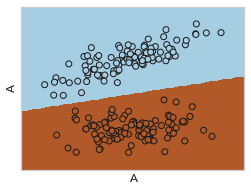

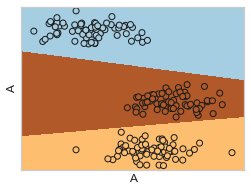

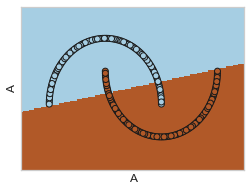

In [264]:
(plotreg(X1,Y1))
(plotreg(X2,Y2))
(plotreg(X3,Y3))

# 2. Test du KFold cross regulation

Here we can't plot the real data boundaries du to the high number of variables (too many dimensions) 

plotreg(X_df1,Y_df1)

plotreg(X_df2,Y_df2)

K-KFold : ici la fonction utilise k-1 pour apprendre et donc 1 pour tester


In [265]:
def Kfold(n,X):
    kf = KFold(n_splits=n)
    for train, test in kf.split(X):
        print("Train Index: ", train_index, "\n")
        print("Test Index: ", test_index)

In [266]:
Kfold(5,X1)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

In [267]:
Kfold(5,X2)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

In [268]:
Kfold(5,X3)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

In [269]:
Kfold(5,X_df1)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

In [270]:
Kfold(5,X_df2)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

Repeated K-fold


In [271]:
def rkfold (splits, repeat, X, Y):
    scores = []
    best_svr = SVR(kernel='rbf')
    random_state = 12883823
    cv = RepeatedKFold(n_splits=splits, n_repeats = repeat ,random_state=random_state)
    for train_index, test_index in cv.split(X):
        print("Train Index: ", train_index, "\n")
        print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    return np.mean(scores)

In [272]:
print(rkfold(5,5,X1,Y1))

Train Index:  [  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  26  27  28  29  30  31  34  35  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  54  56  57  60  61  62  63  64  65  66
  67  68  69  74  75  77  78  82  84  85  86  87  88  89  90  93  94  95
  96  98  99 100 101 102 103 104 105 106 107 108 109 110 112 113 114 115
 116 118 119 120 122 124 125 126 127 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 152 153 155 156 157
 158 159 160 162 163 165 166 167 168 169 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 191 193 195 196 197 198 199] 

Test Index:  [  0   2  24  25  32  33  36  51  52  53  55  58  59  70  71  72  73  76
  79  80  81  83  91  92  97 111 117 121 123 128 151 154 161 164 170 171
 172 190 192 194]
Train Index:  [  0   2   4   5   7   9  10  11  12  13  14  15  16  17  19  20  21  22
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 4. Regressin logistique implémentée

In [273]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [274]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [275]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    weights = np.zeros(features.shape[1])
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
    return weights

In [276]:
weights1 = logistic_regression(X_df1, Y_df1,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-680485.3717707803


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


In [278]:
weights2 = logistic_regression(X_df2, Y_df2,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-745.6537188206551
-355.86914359011666
-279.7083975294627
-241.36586468099273
-217.2824001275719
-200.37668699884836
-187.69479043939782
-177.74732922038453
-169.68717001283443
-162.99133125656618
-157.31723880577147
-152.43014788795614
-148.1633658029366
-144.3950348077032
-141.0338869694155
-138.0101412171635
-135.26948626202147
-132.7689876975619
-130.47423451125053
-128.35730652975803
-126.3952989926444
-124.56923339553961
-122.86324127912661
-121.26394419682168
-119.75997686571274
-118.34161628715665
-117.00049029842876
-115.72934636082442
-114.52186652064917
-113.37251811549885


# Comparaison des précisions (accuracies) pour la régression logistique native (de sklearn) et la méthode scratch



In [279]:
weightsS1 = logistic_regression(X1, Y1,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-138.13062706799857
-4.923243674812389
-2.990853917178036
-2.2420571769837463
-1.828872548511059
-1.5618557928306387
-1.3728892397958585
-1.230993051616991
-1.1198940619163191
-1.0301606378195483
-0.9559196454244119
-0.8933078145148019
-0.8396715211644934
-0.7931229416540236
-0.752279489205032
-0.7161035531248365
-0.6838000134095734
-0.6547484974464963
-0.6284573084528287
-0.604531307233779
-0.5826490292823547
-0.5625460649206792
-0.5440027793983429
-0.5268350988792825
-0.510887500135512
-0.49602760924071054
-0.48214199189272033
-0.469132837801584
-0.45691532392010115
-0.44541549878046477


In [280]:
weightsS2 = logistic_regression(X2, Y2,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-118.0869934473834


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


-inf
-inf


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


In [281]:
weightsS3 = logistic_regression(X3,Y3,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-138.43235987844753
-52.32845276136272
-50.1552557752693
-49.67827186981684
-49.53634506831655
-49.4881869080315
-49.470700089519255
-49.464103650567
-49.461558753777375
-49.4605634748224
-49.46017095524246
-49.46001534326634
-49.45995345014511
-49.45992878222995
-49.459918937960936
-49.4599150061888
-49.45991343504255
-49.459912807004415
-49.45991255590561
-49.45991245549961
-49.459912415347326
-49.45991239928962
-49.45991239286761
-49.45991239029918
-49.45991238927195
-49.45991238886111
-49.45991238869679
-49.45991238863107
-49.45991238860479
-49.459912388594276


In [282]:
clfX1 = LogisticRegression(fit_intercept=True, C = 1e15)
clfX1.fit(X1, Y1)
print(clfX1.intercept_, clfX1.coef_)
print(weightsS1)


[5.37819246] [[  5.37008633 -23.72723022]]
[  2.23805337   2.31114862 -10.04603695]


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [283]:
clfX2 = LogisticRegression(fit_intercept=True, C = 1e15)
clfX2.fit(X2, Y2)
print(clfX2.intercept_, clfX2.coef_)
print(weightsS2)

[ -2.91527158 -11.01213789  10.84372846] [[ 3.11824314  5.69598019]
 [ 1.67658433 -7.42879217]
 [ 1.92180316  0.24982046]]
[  681.94558944 -2231.00396306 -2456.62090312]


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [284]:
clfX3 = LogisticRegression(fit_intercept=True, C = 1e15)
clfX3.fit(X3, Y3)
print(clfX3.intercept_, clfX3.coef_)
print(weightsS3)

[0.96996906] [[ 1.15772892 -6.19533409]]
[ 0.97044258  1.15796642 -6.19770331]


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [285]:
clf1 = LogisticRegression(fit_intercept=True, C = 1e15)
clf1.fit(X_df1, Y_df1)
print(clf1.intercept_, clf1.coef_)
print(weights1)

[0.25218015] [[ 7.09890494e+00  1.34771790e+00  7.11416853e-02 -2.55126992e-01
   1.56339481e-02 -7.62924116e-02 -2.54131021e-01 -3.90828998e-01
  -1.91638156e-01 -1.08654011e-01 -1.64237349e-02  1.75590056e-02
   7.44453999e-01  1.58833759e-01 -7.61481324e-02 -7.72019705e-03
  -2.31775240e-02 -5.48547925e-02 -2.42488334e-02 -2.33212493e-02
  -1.97829525e-04  1.12827700e+00 -2.22992112e-01 -4.71177194e-03
  -2.52300786e-02 -1.38277115e-01 -7.36311777e-01 -1.00025933e+00
  -3.65323639e-01 -3.30182572e-01 -7.10373188e-02]]
[  21.81452798  353.13052854  154.58233662   39.92517152  260.19191638
   -7.08747403   -3.838876    -20.46109389  -29.07993001  -12.11310086
   -6.04502543   -1.20000111    4.76907902   41.59058752  -27.22927569
  -44.01687686   -0.44217237   -4.27891332   -6.11681133   -1.61708515
   -1.62736563   -0.37164405  159.0429128  -126.4781168  -124.42850044
   -8.97702375   -7.90846986  -64.35543685  -80.2240536   -23.92128492
  -19.9211037    -5.72416996]


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [286]:
clf2 = LogisticRegression(fit_intercept=True, C = 1e15)
clf2.fit(X_df2, Y_df2)
print(clf2.intercept_, clf2.coef_)
print(weights2)

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-1.06056275] [[  45.3474861   317.68469917  214.07214476  -52.8996282   -10.27389313
   263.6208523     6.55996807   -5.89035848  245.51249825  -35.48906116
   -32.63304044  122.77821903  404.84550895 -118.64138787  -50.21105505
    35.48201936  -14.88118847  -16.94212564 -280.02082745   63.40751412
  -268.35738282 -169.98151562 -457.36041812  -81.04186382  -61.7432641
    11.98213315   88.81397854  170.77404724  139.65646713  -23.03141092
   281.02798501   34.98986155   40.0499869  -165.41248483   -1.25650357
    13.04674388   97.08905873 -280.28110518  -80.20955063  -65.62199644
   -92.02786181  361.19443356   59.97256506  195.31802821   30.9742072
   311.31784902  -22.96337074  -46.10415097   36.4981846    23.04744965
    -3.16286933  -84.50316063 -299.07164039 -297.61924449  411.41505571
   -51.26584149  125.87298857 -323.98846931 -368.658639     50.44879871
  -105.71892405  238.22972352  -13.12602291   45.87638515  120.82275054
    27.00989785  -26.73411083 -391.39535298   54.679

In [287]:
data_with_intercept = np.hstack((np.ones((X1.shape[0], 1)),X1))

final_scores = np.dot(data_with_intercept, weightsS1)
preds = np.round(sigmoid(final_scores))
print('Accuracy from scratch: {0}'.format((preds == Y1).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clfX1.score(X1, Y1)))


Accuracy from scratch: 1.0
Accuracy from sk-learn: 1.0


In [288]:
data_with_intercept = np.hstack((np.ones((X2.shape[0], 1)),X2))

final_scores = np.dot(data_with_intercept, weightsS2)
preds = np.round(sigmoid(final_scores))
print('Accuracy from scratch: {0}'.format((preds == Y2).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clfX2.score(X2, Y2)))


Accuracy from scratch: 0.565
Accuracy from sk-learn: 1.0


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [289]:
data_with_intercept = np.hstack((np.ones((X3.shape[0], 1)),X3))

final_scores = np.dot(data_with_intercept, weightsS3)
preds = np.round(sigmoid(final_scores))
print('Accuracy from scratch: {0}'.format((preds == Y3).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clfX3.score(X3, Y3)))


Accuracy from scratch: 0.89
Accuracy from sk-learn: 0.89


In [290]:
data_with_intercept = np.hstack((np.ones((X_df1.shape[0], 1)),X_df1))

final_scores = np.dot(data_with_intercept, weights1)
preds = np.round(sigmoid(final_scores))
print('Accuracy from scratch: {0}'.format((preds == Y_df1).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf1.score(X_df1, Y_df1)))

Accuracy from scratch: 0.9507908611599297
Accuracy from sk-learn: 1.0


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [291]:
data_with_intercept = np.hstack((np.ones((X_df2.shape[0], 1)),X_df2))

final_scores = np.dot(data_with_intercept, weights2)
preds = np.round(sigmoid(final_scores))
print('Accuracy from scratch: {0}'.format((preds == Y_df2).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(X_df2, Y_df2)))


Accuracy from scratch: 0.9777777777777777
Accuracy from sk-learn: 1.0


# On met cette fois la régression logistique dans le 10-kfold

In [292]:
from sklearn.model_selection import cross_validate

def Kfold(n,X,Y):
    kf = KFold(n_splits=n)
    for train, test in kf.split(X):
        print("Train Index: ", train_index, "\n")
        print("Test Index: ", test_index)
    lg = LogisticRegression()
    scores = cross_val_score(lg, X, Y, cv=kf,scoring='accuracy') 
    print(scores)
    print('average score = ', np.mean(scores))

In [293]:
Kfold(10,X1,Y1)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [294]:
Kfold(10,X2,Y2)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/py

In [295]:
Kfold(10,X3,Y3)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [296]:
Kfold(10,X_df1,Y_df1)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [297]:
Kfold(10,X_df2,Y_df2)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

[0.97222222 0.59259259 0.68518519 0.76851852 0.46296296 0.41666667
 0.47222222 0.25       0.69444444 0.62962963]
average score =  0.5944444444444444


/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [298]:
def Kfoldtest(n,X,Y,clf):
    kf = KFold(n_splits=n)
    for train, test in kf.split(X):
        print("Train Index: ", train_index, "\n")
        print("Test Index: ", test_index)
    scores = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy') 
    print(scores)
    print('average score = ', np.mean(scores))
    
    
    

In [299]:
Kfoldtest(10,X1,Y1,clfX1)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [300]:
Kfoldtest(10,X2,Y2,clfX2)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/py

In [301]:
Kfoldtest(10,X3,Y3,clfX3)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [302]:
Kfoldtest(10,X_df1,Y_df1,clf1)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [303]:
Kfoldtest(10,X_df2,Y_df2,clf2)

Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  45
  46  47  48  49  50  52  53  54  55  57  60  61  62  63  64  66  67  69
  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  88  89  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110
 111 112 113 115 116 121 122 123 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 148 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 170 171 173 174 178 179
 180 181 182 183 184 185 186 187 189 192 193 194 195 196 198 199] 

Test Index:  [  0   7   9  22  24  27  31  34  36  43  51  56  58  59  65  68  70  80
  87  90 102 114 117 118 119 120 124 141 149 154 159 169 172 175 176 177
 188 190 191 197]
Train Index:  [  1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  25  26  28  29  30  32  33  35  37  38  39  40  41  42  44  

/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenzakadri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

[0.97222222 0.67592593 0.61111111 0.66666667 0.2962963  0.59259259
 0.67592593 0.53703704 0.93518519 0.61111111]
average score =  0.6574074074074074


# Conclusion 

Les accuracies représentent la précision du Kfold. En effet, le Kfold découpe nos données en n_splits (ici 10) pour s'entrainer sur 80% des découpages et tester enfin sur les 20% restant. L'accuracy correspond donc à la réussite sur le test final. Par exemple une accuracy de 1, signifiera que l'algorithme a totalement appris de son apprentissage (les trains). Ce qui pourrait correspondre à un sur-apprentissage.
Dans ce TME nous avons comparer deux façons de faire des régressions logistiques. Sachant que la fonction implémentée dans Sklearn permet de vérifier le bon fonctionnement de notre algorithme de régression logistique binaire. 

On remarque tout d'abord, que l'échantillon X2 n'est pas défini par 2 classes (non bianire) ce qui peut expliquer les mauvais résultats de régression logistiques logicRegression(). 
Ensuite, on remarque que les résultats sont proches entre les deux types de Kfold (avec les deux façon de faire les régressions logistiques). 
On remarque néamoins que la régressions des données BreastDiagnosis (Df1) entraîne beaucoup de valeur -inf, ce qui pourrait expliquer la haute accuracy. En effet on peut se demander si l'algorithem a mis cette valeur par défaut et donc a retrouvé la valeur dans le test.

Enfin concernant le nombre d'itération nécessaire pour l'optimisation, le tutoriel donné en exemple, utilise un gradient ascendant pour maximiser le log_likelihood (très négatif). Aussi, il n'y a pas d'itération, excepté le nombre de split pour le K-fold.